In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Skillbox/obj_detection2"

/content/drive/MyDrive/Skillbox/obj_detection2


In [ ]:
if False:
  
    !git clone https://github.com/tensorflow/models
    !cd models/research && protoc object_detection/protos/*.proto --python_out=.
    !cd models/research && export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim && python object_detection/builders/model_builder_test.py

In [ ]:
!pip install tf-models-official
!pip install tf_slim
!pip install lvis

     |████████████████████████████████| 1.1MB 9.7MB/s 
     |████████████████████████████████| 706kB 39.3MB/s 
     |████████████████████████████████| 1.2MB 41.7MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 174kB 37.2MB/s 
     |████████████████████████████████| 37.6MB 75kB/s 
     |████████████████████████████████| 358kB 40.2MB/s 
     |████████████████████████████████| 645kB 38.0MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp37-none-any.whl size=20070 sha256=ac1cc33c93e77adfdbde16701daa032a4a729b31b607c1e8c88e83f498a0b257
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0c3a5a49feb2fecd468d508067c733fba5192f726ad1
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16172 sha256=76ef5e685689c30e5b834dfb8132385708d9219420866b8cc9efae306dfa3319
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704

In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 512kB 39.5MB/s 
     |████████████████████████████████| 3.8MB 40.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=9ea2edddac5ec605f5ba47772338f8c1d2bb5b39ffb1636e1193bfaaab38e150
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tf-models-official 2.4.0 has requirement tensorflow>=2.4.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-est

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import pandas as pd
import os
from PIL import Image
%tensorflow_version 1.x
import tensorflow as tf

import sys
sys.path.insert(0, '/content/drive/MyDrive/Skillbox/obj_detection2/models/research')

from object_detection.utils import dataset_util

In [ ]:
print(tf.__version__)

1.15.2


In [ ]:
annot = pd.read_csv('my_data/annot.csv')
annot.head()

,id,classes_text,classes,xmin,ymin,xmax,ymax
0,1.JPG,headphones,1,1926,884,3120,1740
1,2.JPG,headphones,1,1460,1470,2790,2215
2,3.JPG,headphones,1,2710,750,3615,1400
3,4.JPG,headphones,1,2600,410,3890,1400
4,5.JPG,headphones,1,1250,780,3700,1925


In [ ]:
def create_tf_example(example):
  
    img_fpath = os.path.join('my_data', example.id)
    img = Image.open(img_fpath)
    height = img.size[1]
    width = img.size[0]
    filename = str.encode(example.id)
    with open(img_fpath, mode='rb') as f:
        encoded_image_data = f.read()
    image_format = b'jpeg'


    xmins = [example.xmin / float(width)] 
    xmaxs = [example.xmax / float(width)] 
    ymins = [example.ymin / float(height)] 
    ymaxs = [example.ymax / float(height)] 
    classes_text = [bytes(example.classes_text, encoding='utf8')]
    classes = [int(example.classes)]

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_image_data),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

In [ ]:
writer = tf.python_io.TFRecordWriter('my_data/train_data.record')

for idx, row in annot.iterrows():
    tf_example = create_tf_example(row)
    writer.write(tf_example.SerializeToString())

writer.close()

In [ ]:
if False:
    !wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2018_01_28.tar.gz
    !tar -xzf ssd_mobilenet_v1_coco_2018_01_28.tar.gz

In [ ]:
%%time

if True:
    # Delete output directory
    !rm -rf my_data/output

!export PYTHONPATH=$PYTHONPATH:models/research:models/research/slim ; python models/research/object_detection/model_main.py \
    --pipeline_config_path=my_data/pipeline.config \
    --model_dir=my_data/output \
    --num_train_steps=15000 \
    --alsologtostderr

W0407 18:39:12.602276 139622333638528 model_lib.py:813] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 15000
I0407 18:39:12.602697 139622333638528 config_util.py:552] Maybe overwriting train_steps: 15000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0407 18:39:12.602845 139622333638528 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0407 18:39:12.603045 139622333638528 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0407 18:39:12.603222 139622333638528 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0407 18:39:12.603398 139622333638528 model_lib.py:829] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to

In [ ]:
!export PYTHONPATH=$PYTHONPATH:models/research:models/research/slim ; python models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=my_data/pipeline.config \
    --trained_checkpoint_prefix=my_data/output/model.ckpt-15000 \
    --output_directory=my_data/output/frozen/

Instructions for updating:
Please use `layer.__call__` method instead.
W0408 06:35:19.297371 139818116589440 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0408 06:35:21.322606 139818116589440 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0408 06:35:21.374339 139818116589440 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0408 06:35:21.422641 139818116589440 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import imageio


from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
PATH_TO_LABELS = 'my_data/label_map.pbtxt'

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [ ]:
PATH_TO_FROZEN_GRAPH = 'my_data/output/frozen/frozen_inference_graph.pb'

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.compat.v2.io.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [ ]:
def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(tensor_name)
            if 'detection_masks' in tensor_dict:
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[1], image.shape[2])
                detection_masks_reframed = tf.cast(tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                tensor_dict['detection_masks'] = tf.expand_dims(detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            output_dict = sess.run(tensor_dict, feed_dict={image_tensor: image})

            output_dict['num_detections'] = int(output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[ 'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

In [ ]:
image_np = imageio.imread('my_data/test.JPG')
image_np_expanded = np.expand_dims(image_np, axis=0)

output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)

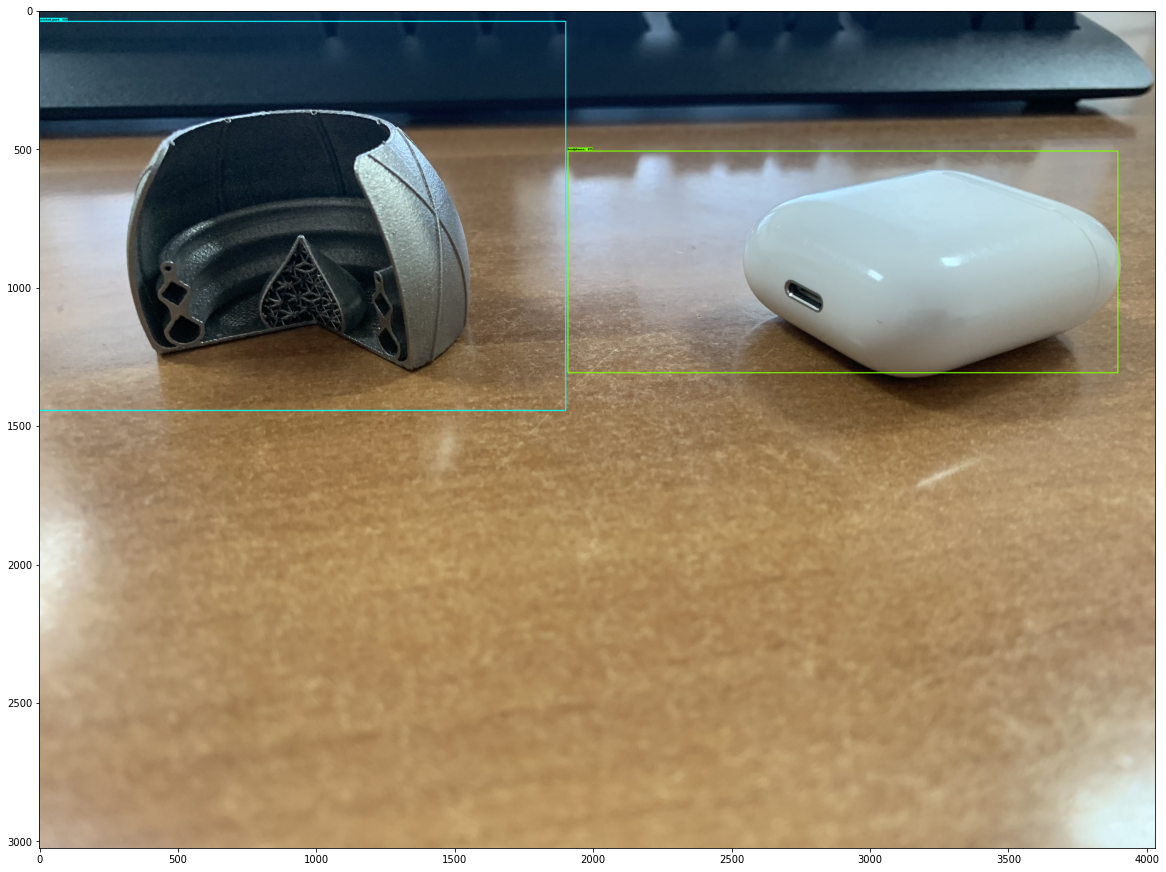

In [ ]:
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks'),
    use_normalized_coordinates=True,
    line_thickness=4,
    min_score_thresh=0.3)

%matplotlib inline
plt.figure(figsize=(20,20))
plt.imshow(image_np)